In [1]:
import nltk, re, pprint
from nltk import word_tokenize
from urllib import request

In [2]:
import pandas as pd
import numpy as np
df_characters=pd.read_csv('ZeldaBotW_nodes_w_attributes_enriched.csv')


In [3]:
import os
import nltk, re
from nltk import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords

path='./ZeldaCharacterFile-Text的副本2'
files=os.listdir(path)

tokenizer=WordPunctTokenizer()
lemmatizer=nltk.WordNetLemmatizer()

tokenlist=[]

for file in files:
    if not os.path.isdir(file):
        text = open(path+'/'+file).read()
        text = re.sub(r'=+ (.*?) =+','',text)
        
        #Exclude characters names:
        #some of our characters have names that are made by multiple words, e.g., "Mo'a Keet", 
        #common enemy names can appear with Upper-, Lower-case, and plural forms, e.g., Bokoblin, bokoblin, bokoblins.
        tkcontent = tokenizer.tokenize(text)
        
        nonamecontent = [w for w in tkcontent if w not in df_characters['Name'].values]

        clearcontent = [w.lower() for w in nonamecontent if w.isalpha() and w not in stopwords.words('spanish')]
        
        lemmatizedcontent=[lemmatizer.lemmatize(w) for w in clearcontent]
        
        tokenlist.extend(set(lemmatizedcontent))
        outputfile = open('./AfterZeldaFile/'+file,'w')
        
        # outputfile = open('./zeldaCorpus.txt','a')
        outputfile.write(str(set(lemmatizedcontent)))

In [4]:
tokenlist

['that',
 'part',
 'nif',
 'fairy',
 'take',
 'about',
 'belief',
 'have',
 'ever',
 'ndabi',
 'bridge',
 'bringing',
 'secret',
 'life',
 'hasn',
 'pouch',
 'goat',
 'friend',
 'nsho',
 'assist',
 'horse',
 'keep',
 'kid',
 'nduring',
 'he',
 'throughout',
 'this',
 't',
 'wa',
 'character',
 'poop',
 'white',
 'the',
 'nena',
 'stable',
 'ngeggle',
 'despite',
 'thing',
 'better',
 'she',
 'nchork',
 'want',
 'then',
 'a',
 'sits',
 'western',
 'who',
 'always',
 'n',
 'botw',
 'leaf',
 'of',
 'behind',
 'around',
 'due',
 'sleep',
 'hylian',
 'encourages',
 'cool',
 'lead',
 'however',
 'leave',
 'cargo',
 'rumor',
 'learned',
 'they',
 'with',
 'day',
 'head',
 'her',
 'against',
 'while',
 'wonder',
 'chore',
 's',
 'in',
 'sings',
 'flees',
 'wild',
 'danger',
 'where',
 'heard',
 'two',
 'mr',
 'man',
 'eat',
 'care',
 'him',
 'tend',
 'castle',
 'tired',
 'asks',
 'nhylian',
 'bed',
 'claim',
 'hyrule',
 'end',
 'breath',
 'before',
 'receive',
 'nbanji',
 'if',
 'bigger',
 'co

In [5]:
import nltk
text=nltk.Text(tokenlist)
fdist= nltk.FreqDist(text)
fdist.most_common(75)

[('the', 657),
 ('n', 657),
 ('in', 657),
 ('of', 588),
 ('to', 573),
 ('is', 562),
 ('breath', 551),
 ('wild', 545),
 ('and', 505),
 ('character', 497),
 ('be', 425),
 ('can', 424),
 ('who', 418),
 ('s', 407),
 ('that', 400),
 ('if', 399),
 ('him', 386),
 ('with', 384),
 ('for', 375),
 ('a', 350),
 ('when', 340),
 ('will', 339),
 ('it', 330),
 ('at', 326),
 ('an', 322),
 ('by', 322),
 ('on', 287),
 ('about', 281),
 ('from', 276),
 ('found', 269),
 ('his', 264),
 ('after', 262),
 ('this', 247),
 ('they', 244),
 ('are', 239),
 ('also', 237),
 ('not', 236),
 ('their', 227),
 ('first', 220),
 ('ancient', 211),
 ('then', 210),
 ('tell', 208),
 ('but', 208),
 ('shrine', 206),
 ('he', 196),
 ('have', 193),
 ('t', 193),
 ('asks', 192),
 ('hylian', 191),
 ('while', 191),
 ('them', 188),
 ('her', 187),
 ('she', 186),
 ('one', 185),
 ('which', 183),
 ('great', 180),
 ('or', 176),
 ('wa', 168),
 ('out', 167),
 ('speaks', 167),
 ('time', 166),
 ('quest', 159),
 ('may', 158),
 ('up', 158),
 ('howev

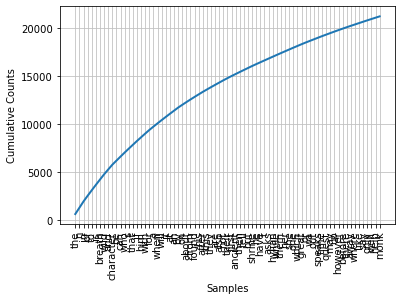

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [6]:
fdist.plot(75,cumulative=True)

TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

1. Since we want to find out which words are important for each race, we're going to create one document per race in BotW. Thus, combine the ZeldaWiki pages into one long list per race.

In [10]:
for i in df_characters.index:   
    roletext = open('./ZeldaCharacterFile-Text/'+df_characters['Name'][i]+'.txt').read()
    roletext = re.sub(r'{|}','',roletext)
    racefile=open('./zeldaRaceCorpus/'+df_characters['Race'][i]+'.txt','w')
    racefile.write(roletext)
    
    totalCorpusFile=open('./totalCorpusOfBtow.txt','a')
    totalCorpusFile.write(roletext)

2. find the top 5 terms within each race.

In [8]:
racepath='./zeldaRaceCorpus/'
racefiles=os.listdir(racepath)

race_freq=[]
for file in racefiles:
    if not os.path.isdir(file):
        text=open(racepath+file).read()

        # tokenize
        tokens = tokenizer.tokenize(text)
        # exclude punc and stopwords
        cleartokens = [w.lower() for w in tokens if w.isalpha() and w not in stopwords.words('spanish')]
        # text version
        tktext=nltk.Text(cleartokens)

        fdist= nltk.FreqDist(tktext)
        
        race_freq.append({'race':file[:-4],'freqItem':fdist.most_common(5)})

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 3131: invalid start byte

In [ ]:
race_freq

3. calculate TF IDF for every word.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

text=open('./totalCorpusOfBtow.txt').read()
tokens = tokenizer.tokenize(text)
cleartokens = [w.lower() for w in tokens if w.isalpha() and w not in stopwords.words('spanish')]

cv = CountVectorizer()
word_count_vector = cv.fit_transform(cleartokens)
tf = pd.DataFrame(word_count_vector.toarray(), columns=cv.get_feature_names())

In [18]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit_transform(cleartokens)
idf = pd.DataFrame({'feature_name':cv.get_feature_names(), 'idf_weights':tfidf_vectorizer.idf_})
print(idf)

     feature_name  idf_weights
0              ab    11.546196
1           aback    10.853049
2         abandon    11.140731
3       abandoned     9.600286
4      abandoning    10.853049
...           ...          ...
8624        zunzo    10.853049
8625      ˈhaɪliə    11.546196
8626          ˈɪm    11.546196
8627        モリブリン    11.546196
8628        目には目を    11.546196

[8629 rows x 2 columns]


4. calculate TF-IDF. Do that for each race.
* List the 5 top words for each race.
* Are these 5 words more descriptive of the race? If yes, what is it about IDF that makes the words more informative?

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

racepath='./zeldaRaceCorpus/'
racefiles=os.listdir(racepath)

num = len(racefiles)
i = 0
for file in racefiles:
    if not os.path.isdir(file):
        text = open(racepath+file).read()
        tokens = tokenizer.tokenize(text)
        
        cleartokens = [w.lower() for w in tokens if w.isalpha() and w not in stopwords.words('spanish')]
        
#       Unfinished: converted my lists to a string was to simply combine all words together in one long string (separated by spaces), repeating each word according to its TC-IDF, which is the Term Count (TF not normalized by len of document) and IDF you previously computed (rounded up to the nearest integer value).
        wc = WordCloud(collocations = False).generate(' '.join(cleartokens))
        
        plt.figure(figsize=(10,50))
        i=i+1
        plt.subplot(num/2,2,i)
        plt.title(file[:-4])
        plt.imshow(wc)

Overlap can make us get full picture of the things like wikipedia. Modularity makess us focus on one topic each time to see the relation.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

DG=nx.DiGraph()

for index, character in df_characters.iterrows():
    DG.add_node(character['Name'], role=character['Role'], gender=character['Gender'], race=character['Race'])

# copy from previous output
DG.add_edges_from([('Baddek', 'Link'), ('Baddek', 'Nazbi'), ('Baddek', 'Savelle'), ('Baddek', 'Yammo'), ('Link', 'Calamity Ganon'), ('Nazbi', 'Lizalfos'), ('Nazbi', 'Cursed Lizalfos'), ('Nazbi', 'Fire-Breath Lizalfos'), ('Nazbi', 'Electric Lizalfos'), ('Nazbi', 'Blue Lizalfos'), ('Nazbi', 'Black Lizalfos'), ('Nazbi', 'Silver Lizalfos'), ('Nazbi', 'Golden Lizalfos'), ('Nazbi', 'Stalizalfos'), ('Yammo', 'Bokoblin'), ('Yammo', 'Cursed Bokoblin'), ('Yammo', 'Stalmoblin'), ('Yammo', 'Stalizalfos'), ('Yammo', 'Blue Bokoblin'), ('Yammo', 'Black Bokoblin'), ('Yammo', 'Silver Bokoblin'), ('Yammo', 'Golden Bokoblin'), ('Bamboo', 'Stone Talus'), ('Stone Talus', 'Link'), ('Stone Talus', 'Nazbi'), ('Stone Talus', 'Savelle'), ('Stone Talus', 'Yammo'), ('Banji', 'Stone Talus'), ('Baumar', 'Stone Talus'), ('Baumar', 'Kilton'), ('Baumar', 'Calamity Ganon'), ('Baumar', 'Stone Talus (Rare)'), ('Kilton', 'Moblin'), ('Kilton', 'Link'), ('Kilton', 'Old Man'), ('Kilton', 'Silver Moblin'), ('Kilton', 'Bokoblin'), ('Calamity Ganon', 'Dark Beast Ganon'), ('Calamity Ganon', 'Fireblight Ganon'), ('Calamity Ganon', 'Thunderblight Ganon'), ('Calamity Ganon', 'Waterblight Ganon'), ('Calamity Ganon', 'Windblight Ganon'), ('Stone Talus (Rare)', 'Stone Talus'), ('Stone Talus (Rare)', 'Calamity Ganon'), ('Stone Talus (Rare)', 'Link'), ('Stone Talus (Rare)', 'Kilton'), ('Bayge', 'Stone Talus'), ('Bayge', 'Calamity Ganon'), ('Bayge', 'Link'), ('Bayge', 'Kilton'), ('Beedle', 'Lizalfos'), ('Beedle', 'Black Lizalfos'), ('Beedle', 'Golden Lizalfos'), ('Beedle', 'Silver Lizalfos'), ('Beedle', 'Electric Lizalfos'), ('Beedle', 'Fire-Breath Lizalfos'), ('Beedle', 'Ice-Breath Lizalfos'), ('Beedle', 'Cursed Lizalfos'), ('Beedle', 'Stalizalfos'), ('Lizalfos', 'Link'), ('Lizalfos', 'Windblight Ganon'), ('Lizalfos', 'Princess Zelda'), ('Lizalfos', 'Daruk'), ('Lizalfos', 'Urbosa'), ('Lizalfos', 'King Rhoam'), ('Black Lizalfos', 'Stone Talus'), ('Golden Lizalfos', 'Lizalfos'), ('Golden Lizalfos', 'Silver Lizalfos'), ('Golden Lizalfos', 'Blue Lizalfos'), ('Golden Lizalfos', 'Black Lizalfos'), ('Golden Lizalfos', 'Fire-Breath Lizalfos'), ('Golden Lizalfos', 'Ice-Breath Lizalfos'), ('Golden Lizalfos', 'Electric Lizalfos'), ('Golden Lizalfos', 'Stalizalfos'), ('Silver Lizalfos', 'Lizalfos'), ('Silver Lizalfos', 'Blue Lizalfos'), ('Silver Lizalfos', 'Black Lizalfos'), ('Silver Lizalfos', 'Calamity Ganon'), ('Silver Lizalfos', 'Link'), ('Silver Lizalfos', 'Cursed Lizalfos'), ('Silver Lizalfos', 'Golden Lizalfos'), ('Silver Lizalfos', 'Fire-Breath Lizalfos'), ('Silver Lizalfos', 'Ice-Breath Lizalfos'), ('Silver Lizalfos', 'Electric Lizalfos'), ('Silver Lizalfos', 'Stalizalfos'), ('Electric Lizalfos', 'Lizalfos'), ('Electric Lizalfos', 'Link'), ('Fire-Breath Lizalfos', 'Link'), ('Fire-Breath Lizalfos', 'Yiga Footsoldier'), ('Fire-Breath Lizalfos', 'Thunderblight Ganon'), ('Ice-Breath Lizalfos', 'Lizalfos'), ('Ice-Breath Lizalfos', 'Cursed Lizalfos'), ('Ice-Breath Lizalfos', 'Fire-Breath Lizalfos'), ('Ice-Breath Lizalfos', 'Electric Lizalfos'), ('Ice-Breath Lizalfos', 'Blue Lizalfos'), ('Ice-Breath Lizalfos', 'Black Lizalfos'), ('Ice-Breath Lizalfos', 'Silver Lizalfos'), ('Ice-Breath Lizalfos', 'Golden Lizalfos'), ('Ice-Breath Lizalfos', 'Stalizalfos'), ('Cursed Lizalfos', 'Yunobo'), ('Cursed Lizalfos', 'Calamity Ganon'), ('Cursed Lizalfos', 'Fireblight Ganon'), ('Cursed Lizalfos', 'Link'), ('Cursed Lizalfos', 'Princess Zelda'), ('Cursed Lizalfos', 'Revali'), ('Cursed Lizalfos', 'Bludo'), ('Cursed Lizalfos', 'Dark Beast Ganon'), ('Cursed Lizalfos', 'King Rhoam'), ('Cursed Lizalfos', 'Bokoblin'), ('Stalizalfos', 'Lizalfos'), ('Stalizalfos', 'Link'), ('Stalizalfos', 'Cursed Lizalfos'), ('Stalizalfos', 'Stalkoblin'), ('Stalizalfos', 'Stalmoblin'), ('Stalizalfos', 'Blue Lizalfos'), ('Stalizalfos', 'Black Lizalfos'), ('Stalizalfos', 'Silver Lizalfos'), ('Stalizalfos', 'Golden Lizalfos'), ('Stalizalfos', 'Fire-Breath Lizalfos'), ('Stalizalfos', 'Ice-Breath Lizalfos'), ('Stalizalfos', 'Electric Lizalfos'), ('Bolson', 'Lynel'), ('Lynel', 'Hudson'), ('Lynel', 'Link'), ('Brigo', 'Link'), ('Brigo', 'Decayed Guardian'), ('Brigo', 'Guardian Stalker'), ('Cambo', 'Link'), ('Chabi', 'Link'), ('Chabi', 'Kilton'), ('Chabi', 'Blue Bokoblin'), ('Chabi', 'Black Bokoblin'), ('Blue Bokoblin', 'Stone Talus'), ('Blue Bokoblin', 'Calamity Ganon'), ('Blue Bokoblin', 'Link'), ('Blue Bokoblin', 'Kilton'), ('Black Bokoblin', 'Link'), ('Black Bokoblin', 'Nazbi'), ('Black Bokoblin', 'Savelle'), ('Black Bokoblin', 'Yammo'), ('Chork', 'Link'), ('Chork', 'Geggle'), ('Geggle', 'Chork'), ('Chumin', 'Link'), ('Dabi', 'Bokoblin'), ('Dabi', 'Link'), ('Dabi', 'Stalkoblin'), ('Dabi', 'Cursed Moblin'), ('Dabi', 'Cursed Lizalfos'), ('Bokoblin', 'Link'), ('Stalkoblin', 'Bokoblin'), ('Stalkoblin', 'Cursed Bokoblin'), ('Stalkoblin', 'Stalmoblin'), ('Stalkoblin', 'Stalizalfos'), ('Stalkoblin', 'Blue Bokoblin'), ('Stalkoblin', 'Black Bokoblin'), ('Stalkoblin', 'Silver Bokoblin'), ('Stalkoblin', 'Golden Bokoblin'), ('Cursed Moblin', 'Nazbi'), ('Daruk', 'Yunobo'), ('Daruk', 'Calamity Ganon'), ('Daruk', 'Fireblight Ganon'), ('Daruk', 'Link'), ('Daruk', 'Princess Zelda'), ('Daruk', 'Revali'), ('Daruk', 'Bludo'), ('Daruk', 'Dark Beast Ganon'), ('Daruk', 'King Rhoam'), ('Daruk', 'Bokoblin'), ('Yunobo', 'Daruk'), ('Yunobo', 'Bludo'), ('Yunobo', 'Black Moblin'), ('Yunobo', 'Fireblight Ganon'), ('Yunobo', 'Link'), ('Fireblight Ganon', 'Link'), ('Fireblight Ganon', 'Malanya'), ('Princess Zelda', 'King Rhoam'), ('Princess Zelda', 'Link'), ('Princess Zelda', 'Impa'), ('Princess Zelda', 'Hylia'), ('Princess Zelda', 'Daruk'), ('Princess Zelda', 'Kass'), ('Revali', 'Link'), ('Revali', 'Windblight Ganon'), ('Revali', 'Princess Zelda'), ('Revali', 'Daruk'), ('Revali', 'Urbosa'), ('Revali', 'King Rhoam'), ('Bludo', 'Yunobo'), ('Bludo', 'Daruk'), ('Dark Beast Ganon', 'Link'), ('Dark Beast Ganon', 'Calamity Ganon'), ('Dark Beast Ganon', 'Princess Zelda'), ('King Rhoam', 'Link'), ('King Rhoam', 'Old Man'), ('King Rhoam', 'Calamity Ganon'), ('King Rhoam', 'Princess Zelda'), ('King Rhoam', 'Impa'), ('Dauntless', 'Nazbi'), ('Ena', 'Molduga'), ('Ena', 'Teake'), ('Ena', 'Traysi'), ('Ena', 'Igneo Talus Titan'), ('Molduga', 'Nazbi'), ('Teake', 'Link'), ('Teake', 'Riju'), ('Teake', 'Buliara'), ('Traysi', 'Link'), ('Traysi', 'Ploka'), ('Traysi', 'Ashai'), ('Traysi', 'Strade'), ('Traysi', 'Lyndae'), ('Traysi', 'Muava'), ('Traysi', 'Dinraal'), ('Traysi', 'Farosh'), ('Traysi', 'Naydra'), ('Traysi', 'King Rhoam'), ('Traysi', 'Princess Zelda'), ('Traysi', 'Molduga'), ('Traysi', 'Molduking'), ('Endai', 'Link'), ('Endai', 'Master Kohga'), ('Master Kohga', 'Link'), ('Epona', 'Link'), ('Epona', 'Malanya'), ('Malanya', 'Link'), ('Fyson', 'Lizalfos'), ('Fyson', 'Link'), ('Goflam', 'Link'), ('Greyson', 'Link'), ('Greyson', 'Yiga Footsoldier'), ('Greyson', 'Thunderblight Ganon'), ('Yiga Footsoldier', 'Master Kohga'), ('Yiga Footsoldier', 'Link'), ('Yiga Footsoldier', 'Calamity Ganon'), ('Yiga Footsoldier', 'Monk Maz Koshia'), ('Yiga Footsoldier', 'Robbie'), ('Yiga Footsoldier', 'Purah'), ('Heehl', 'Dark Beast Ganon'), ('Heehl', 'Fireblight Ganon'), ('Heehl', 'Thunderblight Ganon'), ('Heehl', 'Waterblight Ganon'), ('Heehl', 'Windblight Ganon'), ('Waterblight Ganon', 'Lizalfos'), ('Waterblight Ganon', 'Link'), ('Windblight Ganon', 'Link'), ('Windblight Ganon', 'Master Kohga'), ('Hestu', 'Link'), ('Hestu', 'Calamity Ganon'), ('Hestu', 'Princess Zelda'), ('Hudson', 'Rhondson'), ('Hudson', 'Bolson'), ('Hudson', 'Link'), ('Rhondson', 'Hudson'), ('Rhondson', 'Link'), ('Hylia', 'Keese'), ('Hylia', 'Link'), ('Hylia', 'Electric Keese'), ('Hylia', 'Ice Keese'), ('Ice Keese', 'Keese'), ('Ice Keese', 'Link'), ('Ice Keese', 'Fire Keese'), ('Ice Keese', 'Electric Keese'), ('Kabetta', 'Bayge'), ('Kabetta', 'Heehl'), ('Kanny', 'Link'), ('Kanny', 'Rock Octorok'), ('Kanny', 'Water Octorok'), ('Kanny', 'Snow Octorok'), ('Kanny', 'Treasure Octorok'), ('Kanny', 'Sky Octorok'), ('Snow Octorok', 'Link'), ('Snow Octorok', 'Rock Octorok'), ('Snow Octorok', 'Water Octorok'), ('Snow Octorok', 'Forest Octorok'), ('Snow Octorok', 'Treasure Octorok'), ('Snow Octorok', 'Sky Octorok'), ('Treasure Octorok', 'Link'), ('Treasure Octorok', 'Rock Octorok'), ('Treasure Octorok', 'Water Octorok'), ('Treasure Octorok', 'Forest Octorok'), ('Treasure Octorok', 'Snow Octorok'), ('Treasure Octorok', 'Sky Octorok'), ('Sky Octorok', 'Link'), ('Kapson', 'Hylia'), ('Kapson', 'Link'), ('Kapson', 'Mipha'), ('Kapson', 'Hudson'), ('Kapson', 'Rhondson'), ('Mipha', 'Chuchu'), ('Mipha', 'Fire Chuchu'), ('Mipha', 'Electric Chuchu'), ('Karson', 'Bokoblin'), ('Karson', 'Silver Bokoblin'), ('Karson', 'Blue Bokoblin'), ('Karson', 'Black Bokoblin'), ('Karson', 'Stalkoblin'), ('Silver Bokoblin', 'Bokoblin'), ('Silver Bokoblin', 'Blue Bokoblin'), ('Silver Bokoblin', 'Black Bokoblin'), ('Silver Bokoblin', 'Golden Bokoblin'), ('Silver Bokoblin', 'Stalkoblin'), ('Kass', 'Lizalfos'), ('Kass', 'Silver Lizalfos'), ('Kass', 'Blue Lizalfos'), ('Kass', 'Black Lizalfos'), ('Kass', 'Fire-Breath Lizalfos'), ('Kass', 'Ice-Breath Lizalfos'), ('Kass', 'Electric Lizalfos'), ('Kass', 'Stalizalfos'), ('Blue Lizalfos', 'Lizalfos'), ('Blue Lizalfos', 'Black Lizalfos'), ('Blue Lizalfos', 'Golden Lizalfos'), ('Blue Lizalfos', 'Silver Lizalfos'), ('Blue Lizalfos', 'Electric Lizalfos'), ('Blue Lizalfos', 'Fire-Breath Lizalfos'), ('Blue Lizalfos', 'Ice-Breath Lizalfos'), ('Blue Lizalfos', 'Cursed Lizalfos'), ('Blue Lizalfos', 'Stalizalfos'), ('Kenyo', 'Lynel'), ('Kenyo', 'Old Man'), ('Kenyo', 'Silver Lynel'), ('Kenyo', 'Link'), ('Kenyo', 'Blue-Maned Lynel'), ('Kenyo', 'White-Maned Lynel'), ('Old Man', 'Princess Zelda'), ('Old Man', 'Link'), ('Old Man', 'Calamity Ganon'), ('Silver Lynel', 'Link'), ('Silver Lynel', 'Naydra'), ('Blue-Maned Lynel', 'Lynel'), ('White-Maned Lynel', 'Lynel'), ('White-Maned Lynel', 'Blue-Maned Lynel'), ('White-Maned Lynel', 'Bokoblin'), ('Silver Moblin', 'Moblin'), ('Silver Moblin', 'Calamity Ganon'), ('Silver Moblin', 'Golden Moblin'), ('Meeshy', 'Link'), ('Meeshy', 'Guardian Scout I'), ('Guardian Scout I', 'Calamity Ganon'), ('Meghyn', 'Nat'), ('Nat', 'Meghyn'), ('Mei', 'Link'), ('Mils', 'Mina'), ('Mina', 'Mils'), ('Mina', 'Link'), ('Chuchu', 'Link'), ('Chuchu', 'Kilton'), ('Chuchu', 'Blue Bokoblin'), ('Chuchu', 'Black Bokoblin'), ('Fire Chuchu', 'Dark Beast Ganon'), ('Fire Chuchu', 'Fireblight Ganon'), ('Fire Chuchu', 'Thunderblight Ganon'), ('Fire Chuchu', 'Waterblight Ganon'), ('Fire Chuchu', 'Windblight Ganon'), ('Electric Chuchu', 'Molduga'), ('Electric Chuchu', 'Teake'), ('Electric Chuchu', 'Traysi'), ('Electric Chuchu', 'Igneo Talus Titan'), ('Misko', 'Link'), ('Misko', 'Prissen'), ('Misko', 'Domidak'), ('Prissen', 'Domidak'), ('Prissen', 'Link'), ('Prissen', 'Misko'), ('Domidak', 'Prissen'), ('Domidak', 'Link'), ('Domidak', 'Misko'), ('Naydra', 'Keese'), ('Naydra', 'Link'), ('Naydra', 'Fire Keese'), ('Naydra', 'Electric Keese'), ('Fire Keese', 'Keese'), ('Fire Keese', 'Link'), ('Fire Keese', 'Electric Keese'), ('Fire Keese', 'Ice Keese'), ('Pelison', 'Greyson'), ('Pelison', 'Axyl'), ('Pelison', 'Bolson'), ('Pelison', 'Hudson'), ('Pelison', 'Rhondson'), ('Axyl', 'Dorill'), ('Axyl', 'Pelison'), ('Pikango', 'Link'), ('Pikango', 'Impa'), ('Pikango', 'Master Kohga'), ('Impa', 'Purah'), ('Impa', 'Paya'), ('Impa', 'Princess Zelda'), ('Impa', 'Link'), ('Impa', 'Hylia'), ('Impa', 'Bokoblin'), ('Impa', 'Calamity Ganon'), ('Impa', 'King Rhoam'), ('Impa', 'Fire Wizzrobe'), ('Urbosa', 'Lizalfos'), ('Urbosa', 'Link'), ('Urbosa', 'Cursed Lizalfos'), ('Urbosa', 'Stalkoblin'), ('Urbosa', 'Stalmoblin'), ('Urbosa', 'Blue Lizalfos'), ('Urbosa', 'Black Lizalfos'), ('Urbosa', 'Silver Lizalfos'), ('Urbosa', 'Golden Lizalfos'), ('Urbosa', 'Fire-Breath Lizalfos'), ('Urbosa', 'Ice-Breath Lizalfos'), ('Urbosa', 'Electric Lizalfos'), ('Rik', 'Steen'), ('Rik', 'Olkin'), ('Steen', 'Trissa'), ('Steen', 'Link'), ('Steen', 'Olkin'), ('Olkin', 'Mellie'), ('Olkin', 'Link'), ('Sho', 'Bokoblin'), ('Sho', 'Blue Bokoblin'), ('Sho', 'Black Bokoblin'), ('Sho', 'Golden Bokoblin'), ('Sho', 'Stalkoblin'), ('Golden Bokoblin', 'Bokoblin'), ('Golden Bokoblin', 'Silver Bokoblin'), ('Golden Bokoblin', 'Blue Bokoblin'), ('Golden Bokoblin', 'Black Bokoblin'), ('Golden Bokoblin', 'Stalkoblin'), ('Sorelia', 'Lizalfos'), ('Sorelia', 'Blue Lizalfos'), ('Sorelia', 'Black Lizalfos'), ('Sorelia', 'Calamity Ganon'), ('Sorelia', 'Link'), ('Sorelia', 'Cursed Lizalfos'), ('Sorelia', 'Golden Lizalfos'), ('Sorelia', 'Fire-Breath Lizalfos'), ('Sorelia', 'Ice-Breath Lizalfos'), ('Sorelia', 'Electric Lizalfos'), ('Sorelia', 'Stalizalfos'), ('Spoone', 'Link'), ('Spoone', 'Naydra'), ('Toren', 'Moblin'), ('Toren', 'Calamity Ganon'), ('Toren', 'Golden Moblin'), ('Golden Moblin', 'Moblin'), ('Golden Moblin', 'Link'), ('Golden Moblin', 'Old Man'), ('Golden Moblin', 'Silver Moblin'), ('Golden Moblin', 'Bokoblin'), ('Totsuna', 'Link'), ('Tye', 'Link'), ('Tye', 'Rock Octorok'), ('Tye', 'Water Octorok'), ('Tye', 'Forest Octorok'), ('Tye', 'Treasure Octorok'), ('Tye', 'Sky Octorok'), ('Forest Octorok', 'Link'), ('Forest Octorok', 'Rock Octorok'), ('Forest Octorok', 'Water Octorok'), ('Forest Octorok', 'Snow Octorok'), ('Forest Octorok', 'Treasure Octorok'), ('Forest Octorok', 'Sky Octorok'), ('Stalmoblin', 'King Rhoam'), ('Stalmoblin', 'Link'), ('Stalmoblin', 'Impa'), ('Stalmoblin', 'Hylia'), ('Stalmoblin', 'Daruk'), ('Stalmoblin', 'Kass'), ('Cursed Bokoblin', 'Bokoblin'), ('Cursed Bokoblin', 'Link'), ('Cursed Bokoblin', 'Stalkoblin'), ('Cursed Bokoblin', 'Cursed Moblin'), ('Cursed Bokoblin', 'Cursed Lizalfos'), ('Zyle', 'Link'), ('Naddon', 'Link'), ('Naddon', 'Rock Octorok'), ('Naddon', 'Water Octorok'), ('Naddon', 'Forest Octorok'), ('Naddon', 'Snow Octorok'), ('Naddon', 'Sky Octorok'), ('Dah Hesho', 'Lynel'), ('Dah Hesho', 'Blue-Maned Lynel'), ('Dah Hesho', 'Bokoblin'), ('Dmitri', 'Kaifa'), ('Dmitri', 'Jana'), ('Dmitri', 'Gleema'), ('Dmitri', 'Link'), ('Dmitri', 'Epona'), ('Kaifa', 'Dmitri'), ('Kaifa', 'Jana'), ('Kaifa', 'Gleema'), ('Jana', 'Dmitri'), ('Jana', 'Kaifa'), ('Jana', 'Gleema'), ('Jana', 'Link'), ('Jana', 'Hudson'), ('Gleema', 'Master Kohga'), ('Gleema', 'Link'), ('Gleema', 'Calamity Ganon'), ('Gleema', 'Monk Maz Koshia'), ('Gleema', 'Robbie'), ('Gleema', 'Purah'), ('Monk Maz Koshia', 'Link'), ('Monk Maz Koshia', 'Yiga Footsoldier'), ('Monk Maz Koshia', 'Thunderblight Ganon'), ('Robbie', 'Jerrin'), ('Robbie', 'Grant\\u00e9'), ('Robbie', 'Purah'), ('Robbie', 'Princess Zelda'), ('Robbie', 'Link'), ('Robbie', 'Calamity Ganon'), ('Purah', 'Impa'), ('Purah', 'Paya'), ('Purah', 'Symin'), ('Purah', 'Monk Maz Koshia'), ('Purah', 'Calamity Ganon'), ('Purah', 'Princess Zelda'), ('Purah', 'Robbie'), ('Kah Mael', 'Hylia'), ('Kah Mael', 'Link'), ('Kah Mael', 'Calamity Ganon'), ("Ke'nai Shakah", 'Hylia'), ("Ke'nai Shakah", 'Link'), ("Ke'nai Shakah", 'Calamity Ganon'), ('Lonni', 'Stalnox'), ('Stalnox', 'Yunobo'), ('Stalnox', 'Calamity Ganon'), ('Stalnox', 'Fireblight Ganon'), ('Stalnox', 'Link'), ('Stalnox', 'Princess Zelda'), ('Stalnox', 'Revali'), ('Stalnox', 'Bludo'), ('Stalnox', 'Dark Beast Ganon'), ('Stalnox', 'King Rhoam'), ('Stalnox', 'Bokoblin'), ('Nell', 'Link'), ('Nell', 'Blue Moblin'), ('Blue Moblin', 'Link'), ('Blue Moblin', 'Decayed Guardian'), ('Blue Moblin', 'Guardian Stalker'), ('Tenne', 'Dmitri'), ('Tenne', 'Kaifa'), ('Tenne', 'Jana'), ('Tenne', 'Gleema'), ('Tenne', 'Link'), ('Tenne', 'Epona'), ('Tutsuwa Nima', 'Hylia'), ('Tutsuwa Nima', 'Link'), ('Tutsuwa Nima', 'Calamity Ganon'), ('Ze Kasho', 'Hylia'), ('Ze Kasho', 'Link'), ('Ze Kasho', 'Calamity Ganon'), ('Hagie', 'Ruli'), ('Hagie', 'Hunnie'), ('Ruli', 'Hagie'), ('Ruli', 'Hunnie'), ('Hunnie', 'Hagie'), ('Hunnie', 'Ruli'), ('Moggs', 'Fyson'), ('Monari', 'Moggs'), ('Ritaag Zumo', 'Hylia'), ('Ritaag Zumo', 'Link'), ('Ritaag Zumo', 'Calamity Ganon'), ("Tu Ka'loh", 'Hylia'), ("Tu Ka'loh", 'Link'), ("Tu Ka'loh", 'Calamity Ganon'), ('Aya', 'Khini'), ('Aya', 'Rudi'), ('Hoz', 'Kilton'), ('Jerrin', 'Robbie'), ('Jerrin', 'Grant\\u00e9'), ('Jerrin', 'Link'), ('Jerrin', 'Purah'), ('Jerrin', 'Nanna'), ('Jerrin', 'Symin'), ('Nanna', 'Claree'), ('Nanna', 'Lasli'), ('Nanna', 'Impa'), ('Nanna', 'Purah'), ('Nanna', 'Jerrin'), ('Nanna', 'Robbie'), ('Nanna', 'Symin'), ('Symin', 'Purah'), ('Symin', 'Link'), ('Symin', 'Impa'), ('Symin', 'Calamity Ganon'), ('Katosa Aug', 'Hylia'), ('Katosa Aug', 'Link'), ('Katosa Aug', 'Calamity Ganon'), ('Nobo', 'Link'), ('Nobo', 'Pitar'), ('Zuna Kai', 'Hylia'), ('Zuna Kai', 'Link'), ('Zuna Kai', 'Calamity Ganon'), ('Glendo', 'Link'), ('Glendo', 'Keese'), ('Etsu Korima', 'Hylia'), ('Etsu Korima', 'Link'), ('Etsu Korima', 'Calamity Ganon'), ('Rohta Chigah', 'Hylia'), ('Rohta Chigah', 'Link'), ('Rohta Chigah', 'Calamity Ganon'), ('Ruvo Korbah', 'Hylia'), ('Ruvo Korbah', 'Link'), ('Ruvo Korbah', 'Calamity Ganon'), ('Yowaka Ita', 'Hylia'), ('Yowaka Ita', 'Link'), ('Yowaka Ita', 'Calamity Ganon'), ('Aliza', 'Link'), ('Benny', 'Link'), ('Canni', 'Epona'), ('Dah Kaso', 'Hylia'), ('Dah Kaso', 'Link'), ('Dah Kaso', 'Calamity Ganon'), ('Dai', 'Lynel'), ('Dai', 'Golden Lynel'), ('Golden Lynel', 'Lynel'), ('Golden Lynel', 'Old Man'), ('Golden Lynel', 'Silver Lynel'), ('Golden Lynel', 'Link'), ('Golden Lynel', 'Blue-Maned Lynel'), ('Golden Lynel', 'White-Maned Lynel'), ('Gotter', 'Princess Zelda'), ('Gotter', 'Chuchu'), ('Gotter', 'Hinox'), ('Hinox', 'Link'), ('Hinox', 'Decayed Guardian'), ('Hinox', 'Guardian Stalker'), ('Haite', 'Link'), ('Haite', 'Myti'), ('Myti', 'Link'), ('Myti', 'Trott'), ('Myti', 'Haite'), ('Katah Chuki', 'Hylia'), ('Katah Chuki', 'Link'), ('Katah Chuki', 'Calamity Ganon'), ('Namika Ozz', 'Hylia'), ('Namika Ozz', 'Link'), ('Namika Ozz', 'Calamity Ganon'), ('Noya Neha', 'Hylia'), ('Noya Neha', 'Link'), ('Noya Neha', 'Calamity Ganon'), ("Saas Ko'sah", 'Hylia'), ("Saas Ko'sah", 'Link'), ("Saas Ko'sah", 'Calamity Ganon'), ('Toffa', 'Link'), ('Toffa', 'Princess Zelda'), ('Branli', 'Link'), ('Konba', 'Link'), ("Maag No'rah", 'Hylia'), ("Maag No'rah", 'Link'), ("Maag No'rah", 'Calamity Ganon'), ('Mijah Rokee', 'Hylia'), ('Mijah Rokee', 'Link'), ('Mijah Rokee', 'Calamity Ganon'), ('Shira Gomar', 'Hylia'), ('Shira Gomar', 'Link'), ('Shira Gomar', 'Calamity Ganon'), ('Black Moblin', 'Stone Talus'), ('Ashe', 'Shamae'), ('Ashe', 'Link'), ('Ashe', 'Breen'), ('Ashe', 'Kish'), ('Shamae', 'Ashe'), ('Breen', 'Epona'), ('Kish', 'Link'), ('Dorill', 'Axyl'), ('Dorill', 'Bludo'), ('Bladon', 'Gonguron'), ('Gonguron', 'Bladon'), ('Boldon', 'Bolson'), ('Boldon', 'Naddon'), ('Boldon', 'Link'), ('Dayto', 'Guardian Stalker'), ('Douma', 'Link'), ('Douma', 'Mipha'), ('Drak', 'Bludo'), ('Drak', 'Link'), ('Drak', 'Yunobo'), ('Dugby', 'Grapp'), ('Dugby', 'Link'), ('Grapp', 'Dugby'), ('Grapp', 'Bludo'), ('Fin', 'Russ'), ('Fin', 'Link'), ('Russ', 'Fin'), ('Gaile', 'Link'), ('Gorae Torr', 'Hylia'), ('Gorae Torr', 'Link'), ('Gorae Torr', 'Calamity Ganon'), ('Jengo', 'Dorill'), ('Jengo', 'Greyson'), ('Jengo', 'Bohrin'), ('Jengo', 'Bludo'), ('Kairo', 'Yunobo'), ('Mayro', 'Ozunda'), ('Offrak', 'Aji'), ('Aji', 'Offrak'), ('Aji', 'Fyson'), ('Aji', 'Pelison'), ('Bargoh', 'Link'), ('Bargoh', 'Bludo'), ('Bargoh', 'Yunobo'), ('Fugo', 'Rohan'), ('Fugo', 'Slergo'), ('Fugo', 'Link'), ('Fugo', 'Igneo Talus'), ('Rohan', 'Fugo'), ('Rohan', 'Slergo'), ('Rohan', 'Igneo Talus'), ('Slergo', 'Rohan'), ('Slergo', 'Fugo'), ('Igneo Talus', 'Lizalfos'), ('Igneo Talus', 'Black Lizalfos'), ('Igneo Talus', 'Golden Lizalfos'), ('Igneo Talus', 'Silver Lizalfos'), ('Igneo Talus', 'Electric Lizalfos'), ('Igneo Talus', 'Fire-Breath Lizalfos'), ('Igneo Talus', 'Ice-Breath Lizalfos'), ('Igneo Talus', 'Cursed Lizalfos'), ('Igneo Talus', 'Stalizalfos'), ('Krane', 'Bludo'), ('Pyle', 'Rogaro'), ('Pyle', 'Bludo'), ('Rogaro', 'Pyle'), ('Tray', 'Volcon'), ('Volcon', 'Tray'), ('Akrah', 'Garshon'), ('Akrah', 'Onya'), ('Akrah', 'Link'), ('Akrah', 'Zumi'), ('Garshon', 'Akrah'), ('Garshon', 'Onya'), ('Garshon', 'Link'), ('Daag Chokah', 'Hylia'), ('Daag Chokah', 'Link'), ('Daag Chokah', 'Calamity Ganon'), ('Ketoh Wawai', 'Hylia'), ('Ketoh Wawai', 'Link'), ('Ketoh Wawai', 'Calamity Ganon'), ('Kuhn Sidajj', 'Hylia'), ('Kuhn Sidajj', 'Link'), ('Kuhn Sidajj', 'Calamity Ganon'), ('Maag Halan', 'Hylia'), ('Maag Halan', 'Link'), ('Maag Halan', 'Calamity Ganon'), ('Chio', 'Link'), ('Chio', 'Hestu'), ('Damia', 'Link'), ('Daz', 'Link'), ('Kula', 'The Great Deku Tree'), ('Kula', 'Kula'), ('The Great Deku Tree', 'Link'), ('The Great Deku Tree', 'Princess Zelda'), ('Maca', 'Link'), ('Natie', 'Link'), ('Peeks', 'The Great Deku Tree'), ('Peeks', 'Link'), ('Pepp', 'Link'), ('Walton', 'Link'), ('Blynne', 'Link'), ('Jini', 'Link'), ('Loone', 'Link'), ('Loone', 'Roscoe'), ('Roscoe', 'Link'), ('Pumaag Nitae', 'Hylia'), ('Pumaag Nitae', 'Link'), ('Pumaag Nitae', 'Calamity Ganon'), ('Shae Katha', 'Hylia'), ('Shae Katha', 'Link'), ('Shae Katha', 'Calamity Ganon'), ('Shoqa Tatone', 'Hylia'), ('Shoqa Tatone', 'Link'), ('Shoqa Tatone', 'Calamity Ganon'), ('Barta', 'Link'), ('Barta', 'Liana'), ('Barta', 'Leena'), ('Barta', 'Riju'), ('Barta', 'Kotta'), ('Barta', 'Perda'), ('Liana', 'Link'), ('Liana', 'Leena'), ('Liana', 'Riju'), ('Liana', 'Barta'), ('Liana', 'Kotta'), ('Leena', 'Link'), ('Leena', 'Liana'), ('Leena', 'Riju'), ('Leena', 'Barta'), ('Leena', 'Kotta'), ('Riju', 'Urbosa'), ('Riju', 'Link'), ('Riju', 'Buliara'), ('Riju', 'Teake'), ('Riju', 'Patricia'), ('Kotta', 'Link'), ('Kotta', 'Liana'), ('Kotta', 'Barta'), ('Perda', 'Pyra'), ('Perda', 'Yaido'), ('Perda', 'Sumati'), ('Perda', 'Barta'), ('Perda', 'Ashai'), ('Perda', 'Wabbin'), ('Calisa', 'Link'), ('Eighth Heroine', 'Seven Heroines'), ('Eighth Heroine', 'Bozai'), ('Eighth Heroine', 'Link'), ('Bozai', 'Link'), ('Gartan', 'Link'), ('Lukan', 'Link'), ('Anche', 'Link'), ('Anche', 'Furosa'), ('Furosa', 'Link'), ('Furosa', 'Greta'), ('Furosa', 'Pokki'), ('Furosa', 'Anche'), ('Benja', 'Robsten'), ('Benja', 'Link'), ('Robsten', 'Benja'), ('Robsten', 'Link'), ('Dila Maag', 'Hylia'), ('Dila Maag', 'Link'), ('Dila Maag', 'Calamity Ganon'), ('Dillie', 'Jora'), ('Dillie', 'Link'), ('Jora', 'Dillie'), ('Jora', 'Link'), ('Jora', 'Bokoblin'), ('Keive Tala', 'Hylia'), ('Keive Tala', 'Link'), ('Keive Tala', 'Calamity Ganon'), ('Konora', 'Link'), ("Korsh O'hu", 'Hylia'), ("Korsh O'hu", 'Link'), ("Korsh O'hu", 'Calamity Ganon'), ('Kyra', 'Link'), ('Misae Suma', 'Hylia'), ('Misae Suma', 'Link'), ('Misae Suma', 'Calamity Ganon'), ('Patricia', 'Link'), ('Patricia', 'Padda'), ('Padda', 'Riju'), ('Padda', 'Patricia'), ('Padda', 'Link'), ('Pokki', 'Link'), ('Pokki', 'Furosa'), ('Raqa Zunzo', 'Hylia'), ('Raqa Zunzo', 'Link'), ('Raqa Zunzo', 'Calamity Ganon'), ('Buliara', 'Riju'), ('Buliara', 'Link'), ('Shabonne', 'Tali'), ('Shabonne', 'Link'), ('Tali', 'Teli'), ('Tali', 'Shabonne'), ('Strade', 'Link'), ('Strade', 'Lyndae'), ('Lyndae', 'Strade'), ('Sudrey', 'Riju'), ('Sudrey', 'Link'), ('Takama Shiri', 'Hylia'), ('Takama Shiri', 'Link'), ('Takama Shiri', 'Calamity Ganon'), ('Teli', 'Tali'), ('Teli', 'Link'), ('Teli', 'Robbie'), ('Teli', 'Calamity Ganon'), ('Tera', 'Kaysa'), ('Tera', 'Cotera'), ('Tera', 'Link'), ('Kaysa', 'Tera'), ('Kaysa', 'Cotera'), ('Kaysa', 'Toren'), ('Cotera', 'Tera'), ('Cotera', 'Kaysa'), ('Cotera', 'Link'), ('Cotera', 'Dorian'), ('Tho Kayu', 'Hylia'), ('Tho Kayu', 'Link'), ('Tho Kayu', 'Calamity Ganon'), ('Ardin', 'Jules'), ('Ardin', 'Nellie'), ('Ardin', 'Estan'), ('Ardin', 'Spera'), ('Jules', 'Link'), ('Nellie', 'Risa'), ('Nellie', 'Link'), ('Nellie', 'Lorn'), ('Nellie', 'Ardin'), ('Estan', 'Maike'), ('Estan', 'Link'), ('Estan', 'Frita'), ('Spera', 'Link'), ('Ashai', 'Link'), ('Ashai', 'Pasha'), ('Ashai', 'Dina'), ('Ashai', 'Risa'), ('Pasha', 'Ashai'), ('Pasha', 'Link'), ('Dina', 'Link'), ('Risa', 'Nellie'), ('Risa', 'Ashai'), ('Risa', 'Link'), ('Risa', 'Pasha'), ('Risa', 'Dina'), ('Aurie Taamu', 'Ashai'), ('Aurie Taamu', 'Isha'), ('Isha', 'Link'), ('Isha', 'Cara'), ('Babi', 'Link'), ('Babi', 'Malena'), ('Babi', 'Marta'), ('Babi', 'Smaude'), ('Babi', 'Teake'), ('Malena', 'Link'), ('Malena', 'Molduga'), ('Marta', 'Link'), ('Marta', 'Babi'), ('Marta', 'Riju'), ('Smaude', 'Link'), ('Bertri', 'Riju'), ('Bertri', 'Link'), ('Calyban', 'Link'), ('Calyban', 'Dalia'), ('Dalia', 'Lorn'), ('Dalia', 'Link'), ('Dalia', 'Kalani'), ('Dalia', 'Makure'), ('Dalia', 'Pearle'), ('Cara', 'Isha'), ('Cara', 'Link'), ('Cara', 'Ashai'), ('Lorn', 'Dalia'), ('Lorn', 'Link'), ('Kalani', 'Danda'), ('Kalani', 'Makure'), ('Kalani', 'Frita'), ('Kalani', 'Ashai'), ('Kalani', 'Pearle'), ('Kalani', 'Dalia'), ('Makure', 'Danda'), ('Makure', 'Kalani'), ('Makure', 'Ashai'), ('Makure', 'Pearle'), ('Makure', 'Dalia'), ('Pearle', 'Rotana'), ('Pearle', 'Urbosa'), ('Pearle', 'Spera'), ('Pearle', 'Link'), ('Pearle', 'Kalani'), ('Pearle', 'Makure'), ('Pearle', 'Ashai'), ('Danda', 'Kalani'), ('Danda', 'Makure'), ('Danda', 'Link'), ('Deltan', 'Link'), ('Dorrah', 'Merina'), ('Dorrah', 'Link'), ('Dorrah', 'Riju'), ('Merina', 'Dorrah'), ('Merina', 'Link'), ('Essa', 'Frelly'), ('Essa', 'Link'), ('Frelly', 'Kohm'), ('Frelly', 'Link'), ('Maike', 'Estan'), ('Maike', 'Link'), ('Frita', 'Link'), ('Fegran', 'Link'), ('Kohm', 'Frelly'), ('Kohm', 'Link'), ('Greta', 'Link'), ('Katta', 'Riju'), ('Katta', 'Link'), ('Laine', 'Link'), ('Laine', 'Tali'), ('Lashley', 'Link'), ('Lashley', 'Riju'), ('Muava', 'Link'), ('Nali', 'Pritana'), ('Nali', 'Riju'), ('Nali', 'Urbosa'), ('Nali', 'Link'), ('Pritana', 'Nali'), ('Pritana', 'Riju'), ('Pritana', 'Urbosa'), ('Pritana', 'Link'), ('Olu', 'Link'), ('Olu', 'Romah'), ('Romah', 'Link'), ('Rotana', 'Pearle'), ('Rotana', 'Link'), ('Rotana', 'Seven Heroines'), ('Rotana', 'Urbosa'), ('Ploka', 'Reeza'), ('Ploka', 'Link'), ('Ploka', 'Riju'), ('Ploka', 'Traysi'), ('Reeza', 'Ploka'), ('Reeza', 'Link'), ('Reeza', 'Riju'), ('Reeza', 'Buliara'), ('Pyra', 'Sumati'), ('Pyra', 'Yaido'), ('Pyra', 'Rotana'), ('Pyra', 'Saula'), ('Pyra', 'Perda'), ('Sumati', 'Pyra'), ('Sumati', 'Yaido'), ('Sumati', 'Rotana'), ('Sumati', 'Saula'), ('Sumati', 'Perda'), ('Yaido', 'Pyra'), ('Yaido', 'Sumati'), ('Yaido', 'Rotana'), ('Yaido', 'Saula'), ('Yaido', 'Perda'), ('Saula', 'Link'), ('Saula', 'Yaido'), ('Rima', 'Buliara'), ('Rima', 'Link'), ('Rima', 'Riju'), ('Rima', 'Patricia'), ('Tauma', 'Link'), ('Molduking', 'Molduga'), ('Molduking', 'Teake'), ('Molduking', 'Traysi'), ('Molduking', 'Igneo Talus Titan'), ('Emri', 'Link'), ('Guy', 'Link'), ('Kachoo', 'Link'), ('Nobiro', 'Link'), ('Ripp', 'Link'), ('Ripp', 'Vilia'), ('Vilia', 'Benja'), ('Vilia', 'Link'), ('Vilia', 'Riju'), ('Shaillu', 'Link'), ('Canolo', 'Sesami'), ('Canolo', 'Oliff'), ('Canolo', 'Canolo'), ('Canolo', 'Palme'), ('Canolo', 'Link'), ('Canolo', 'Blue Bokoblin'), ('Sesami', 'Link'), ('Sesami', 'Oliff'), ('Sesami', 'Flaxel'), ('Sesami', 'Canolo'), ('Sesami', 'Palme'), ('Oliff', 'Sesami'), ('Oliff', 'Link'), ('Flaxel', 'Sesami'), ('Flaxel', 'Oliff'), ('Flaxel', 'Flaxel'), ('Flaxel', 'Palme'), ('Flaxel', 'Link'), ('Flaxel', 'Blue Bokoblin'), ('Keeha Yoog', 'Hylia'), ('Keeha Yoog', 'Link'), ('Keeha Yoog', 'Calamity Ganon'), ('Kema Kosassa', 'Hylia'), ('Kema Kosassa', 'Link'), ('Kema Kosassa', 'Calamity Ganon'), ('Kihiro Moh', 'Hylia'), ('Kihiro Moh', 'Link'), ('Kihiro Moh', 'Calamity Ganon'), ('Maypin', 'Link'), ('Moza', 'Link'), ('Piaffe', 'Link'), ('Pirou', 'Link'), ('Sasa Kai', 'Hylia'), ('Sasa Kai', 'Link'), ('Sasa Kai', 'Calamity Ganon'), ('Suma Sahma', 'Hylia'), ('Suma Sahma', 'Link'), ('Suma Sahma', 'Calamity Ganon'), ('Falmark', 'Link'), ('Falmark', 'Baumar'), ('Teba', 'Saki'), ('Teba', 'Tulin'), ('Teba', 'Revali'), ('Teba', 'Harth'), ('Teba', 'Link'), ('Teba', 'Calamity Ganon'), ('Teba', 'Windblight Ganon'), ('Saki', 'Teba'), ('Saki', 'Tulin'), ('Saki', 'Link'), ('Saki', 'Revali'), ('Tulin', 'Teba'), ('Tulin', 'Saki'), ('Tulin', 'Link'), ('Harth', 'Molli'), ('Harth', 'Revali'), ('Harth', 'Teba'), ('Harth', 'Link'), ('Harth', 'Calamity Ganon'), ('Harth', 'Kaneli'), ('Goma Asaagh', 'Hylia'), ('Goma Asaagh', 'Link'), ('Goma Asaagh', 'Calamity Ganon'), ('Hia Miu', 'Hylia'), ('Hia Miu', 'Link'), ('Hia Miu', 'Calamity Ganon'), ('Kiah Toza', 'Hylia'), ('Kiah Toza', 'Link'), ('Kiah Toza', 'Calamity Ganon'), ('Mozo Shenno', 'Hylia'), ('Mozo Shenno', 'Link'), ('Mozo Shenno', 'Calamity Ganon'), ('Noe Rajee', 'Hylia'), ('Noe Rajee', 'Link'), ('Noe Rajee', 'Calamity Ganon'), ('Qaza Tokki', 'Hylia'), ('Qaza Tokki', 'Link'), ('Qaza Tokki', 'Calamity Ganon'), ('To Quomo', 'Hylia'), ('To Quomo', 'Link'), ('To Quomo', 'Calamity Ganon'), ('Harlow', 'Danton'), ('Harlow', 'Link'), ('Harry (Breath of the Wild)', 'Mary (Breath of the Wild)'), ('Harry (Breath of the Wild)', 'Monkton'), ('Mary (Breath of the Wild)', 'Harry (Breath of the Wild)'), ('Mary (Breath of the Wild)', 'Monkton'), ('Monkton', 'Link'), ('Ariane', 'Link'), ('Ariane', 'Galli'), ('Ariane', 'Lester'), ('Galli', 'Link'), ('Galli', 'Epona'), ('Lester', 'Link'), ('Cree', 'Kass'), ('Cree', 'Amali'), ('Cree', 'Notts'), ('Cree', 'Kotts'), ('Cree', 'Genli'), ('Cree', 'Kheel'), ('Cree', 'Link'), ('Cree', 'Kaneli'), ('Amali', 'Kass'), ('Amali', 'Notts'), ('Amali', 'Kotts'), ('Amali', 'Genli'), ('Amali', 'Cree'), ('Amali', 'Kheel'), ('Genli', 'Kass'), ('Genli', 'Amali'), ('Genli', 'Notts'), ('Genli', 'Kotts'), ('Genli', 'Cree'), ('Genli', 'Kheel'), ('Genli', 'Link'), ('Genli', 'Harth'), ('Genli', 'Kaneli'), ('Kheel', 'Kass'), ('Kheel', 'Amali'), ('Kheel', 'Notts'), ('Kheel', 'Kotts'), ('Kheel', 'Genli'), ('Kheel', 'Cree'), ('Kheel', 'Link'), ('Kaneli', 'Teba'), ('Gesane', 'Link'), ('Gesane', 'Frost Talus'), ('Frost Talus', 'Lynel'), ('Lanno Kooh', 'Hylia'), ('Lanno Kooh', 'Link'), ('Lanno Kooh', 'Calamity Ganon'), ('Molli', 'Harth'), ('Pondo', 'Link'), ('Rona Kachta', 'Hylia'), ('Rona Kachta', 'Link'), ('Rona Kachta', 'Calamity Ganon'), ("Tena Ko'sah", 'Hylia'), ("Tena Ko'sah", 'Link'), ("Tena Ko'sah", 'Calamity Ganon'), ('Bedoli', 'Laissa'), ('Bedoli', 'Link'), ('Cecili', 'Link'), ('Huck', 'Verla'), ('Huck', 'Revali'), ('Jogo', 'Juney'), ('Juney', 'Jogo'), ('Mazli', 'Link'), ('Gruve', 'Sidon'), ('Gruve', 'Link'), ('Gruve', 'Lynel'), ('Gruve', 'King Dorephan'), ('King Dorephan', 'Link'), ('King Dorephan', 'Mipha'), ('King Dorephan', 'Muzu'), ('King Dorephan', 'Princess Zelda'), ('Ledo', 'Dento'), ('Ledo', 'Link'), ('Ledo', 'Sidon'), ('Dento', 'Marot'), ('Dento', 'Mipha'), ('Dento', 'Link'), ('Tona', 'Cleff'), ('Tona', 'Link'), ('Tona', 'Sidon'), ('Tona', 'Tula'), ('Tona', 'Laruta'), ('Cleff', 'Tona'), ('Cleff', 'Link'), ('Tula', 'Link'), ('Tula', 'Sidon'), ('Tula', 'Waterblight Ganon'), ('Tula', 'King Dorephan'), ('Laruta', 'Tona'), ('Laruta', 'Tula'), ('Laruta', 'Sidon'), ('Laruta', 'Link'), ('Laruta', 'King Dorephan'), ('Laruta', 'Mipha'), ('Dagah Keek', 'Hylia'), ('Dagah Keek', 'Link'), ('Dagah Keek', 'Calamity Ganon'), ('Soh Kofi', 'Hylia'), ('Soh Kofi', 'Link'), ('Soh Kofi', 'Calamity Ganon'), ('Torfeau', 'Sidon'), ('Torfeau', 'Hinox'), ('Bazz', 'Rivan'), ('Bazz', 'Gaddison'), ('Bazz', 'Link'), ('Bazz', 'King Dorephan'), ('Bazz', 'Mipha'), ('Bazz', 'Sidon'), ('Rivan', 'Trello'), ('Rivan', 'Dunma'), ('Rivan', 'Link'), ('Rivan', 'Bazz'), ('Rivan', 'Gaddison'), ('Gaddison', 'Bazz'), ('Gaddison', 'Rivan'), ('Gaddison', 'Link'), ('Gaddison', 'Sidon'), ('Gaddison', 'Mipha'), ('Gaddison', 'Seggin'), ('Gaddison', 'King Dorephan'), ('Gaddison', 'Kapson'), ('Marot', 'Dento'), ('Marot', 'Link'), ('Dunma', 'Rivan'), ('Dunma', 'Trello'), ('Dunma', 'Dunma'), ('Dunma', 'Link'), ('Dunma', 'King Dorephan'), ('Dunma', 'Sidon'), ('Dunma', 'Mipha'), ('Trello', 'Rivan'), ('Trello', 'Dunma'), ('Trello', 'Link'), ('Trello', 'Mipha'), ('Trello', 'Dento'), ('Finley', 'Kodah'), ('Finley', 'Kayden'), ('Finley', 'Sidon'), ('Finley', 'Link'), ('Kodah', 'Kayden'), ('Kodah', 'Finley'), ('Kodah', 'Link'), ('Kodah', 'Mipha'), ('Kodah', 'King Dorephan'), ('Kodah', 'Sidon'), ('Kayden', 'Kodah'), ('Kayden', 'Finley'), ('Kayden', 'Link'), ('Fronk', 'Mei'), ('Fronk', 'Tumbo'), ('Fronk', 'Keye'), ('Fronk', 'Dento'), ('Fronk', 'Link'), ('Tumbo', 'Mei'), ('Tumbo', 'Fronk'), ('Tumbo', 'Keye'), ('Tumbo', 'Mipha'), ('Tumbo', 'Calamity Ganon'), ('Tumbo', 'Link'), ('Keye', 'Mei'), ('Keye', 'Fronk'), ('Keye', 'Tumbo'), ('Keye', 'Mipha'), ('Keye', 'Link'), ('Seggin', 'Link'), ('Seggin', 'Mipha'), ('Jiahto', 'Mipha'), ('Muzu', 'Mipha'), ('Muzu', 'Link'), ('Muzu', 'King Dorephan'), ('Muzu', 'Sidon'), ('Laflat', 'Mipha'), ('Laflat', 'King Dorephan'), ('Laflat', 'Lynel'), ('Reagah', 'Sidon'), ('Reagah', 'Link'), ('Shai Yota', 'Hylia'), ('Shai Yota', 'Link'), ('Shai Yota', 'Calamity Ganon'), ('Ami', 'Izra'), ('Ami', 'Link'), ('Ami', 'Yolero'), ('Quince', 'Satty'), ('Satty', 'Quince'), ('Satty', 'Satty'), ('Satty', 'Link'), ("Jitan Sa'mi", 'Hylia'), ("Jitan Sa'mi", 'Link'), ("Jitan Sa'mi", 'Calamity Ganon'), ("Tahno O'ah", 'Hylia'), ("Tahno O'ah", 'Link'), ("Tahno O'ah", 'Calamity Ganon'), ('Agus', 'Link'), ('Celessa', 'Impa'), ('Celessa', 'Link'), ('Celessa', 'King Rhoam'), ('Garill', 'Link'), ('Joute', 'Link'), ('Spinch (Horse)', 'Spinch (Hylian)'), ('Flavi', 'Link'), ('Garini', 'Link'), ('Muwo Jeem', 'Hylia'), ('Muwo Jeem', 'Link'), ('Muwo Jeem', 'Calamity Ganon'), ('Wabbin', 'Perda'), ('Wabbin', 'Wabbin'), ('Tawa Jinn', 'Hylia'), ('Tawa Jinn', 'Link'), ('Tawa Jinn', 'Calamity Ganon'), ('Amira', 'Pruce'), ('Amira', 'Ivee'), ('Amira', 'Azu'), ('Amira', 'Nikki'), ('Amira', 'Link'), ('Pruce', 'Amira'), ('Pruce', 'Ivee'), ('Pruce', 'Azu'), ('Pruce', 'Link'), ('Ivee', 'Pruce'), ('Ivee', 'Amira'), ('Ivee', 'Azu'), ('Ivee', 'Link'), ('Azu', 'Pruce'), ('Azu', 'Amira'), ('Azu', 'Ivee'), ('Azu', 'Sefaro'), ('Azu', 'Karin'), ('Azu', 'Link'), ('Nikki', 'Nack'), ('Nikki', 'Nebb'), ('Nikki', 'Narah'), ('Nikki', 'Amira'), ('Nikki', 'Link'), ('Aster', 'Medda'), ('Aster', 'Bolson'), ('Aster', 'Link'), ('Aster', 'Karin'), ('Medda', 'Aster'), ('Medda', 'Link'), ('Karin', 'Reede'), ('Karin', 'Clavia'), ('Sefaro', 'Sayge'), ('Sefaro', 'Senna'), ('Sefaro', 'Azu'), ('Sefaro', 'Link'), ('Clavia', 'Reede'), ('Clavia', 'Karin'), ('Clavia', 'Link'), ('Reede', 'Clavia'), ('Reede', 'Karin'), ('Reede', 'Link'), ('Dantz', 'Link'), ('Horned Statue', 'Teebo'), ('Horned Statue', 'Hylia'), ('Teebo', 'Link'), ('Teebo', 'Horned Statue'), ('Teebo', 'Reede'), ('Koyin', 'Dantz'), ('Koyin', 'Link'), ('Leop', 'Prima'), ('Prima', 'Manny (Breath of the Wild)'), ('Prima', 'Link'), ('Manny (Breath of the Wild)', 'Link'), ('Nack', 'Link'), ('Nack', 'Sayge'), ('Sayge', 'Senna'), ('Sayge', 'Sefaro'), ('Narah', 'Nack'), ('Narah', 'Nikki'), ('Narah', 'Nebb'), ('Narah', 'Link'), ('Narah', 'Amira'), ('Nebb', 'Nack'), ('Nebb', 'Nikki'), ('Nebb', 'Narah'), ('Nebb', 'Link'), ('Paya', 'Impa'), ('Paya', 'Purah'), ('Paya', 'Link'), ('Paya', 'Dorian'), ('Paya', 'Cado'), ('Ralera', 'Rozel'), ('Ralera', 'Rhodes'), ('Ralera', 'Link'), ('Rozel', 'Ralera'), ('Rhodes', 'Ralera'), ('Rhodes', 'Link'), ('Senna', 'Sayge'), ('Senna', 'Sefaro'), ('Seldon', 'Sophie'), ('Seldon', 'Link'), ('Seldon', 'Sayge'), ('Sophie', 'Seldon'), ('Sophie', 'Karson'), ('Sophie', 'Link'), ('Tamana', 'Link'), ('Thadd', 'Link'), ('Thadd', 'Seldon'), ('Tokk', 'Link'), ('Tokk', 'Uma'), ('Uma', 'Link'), ('Uma', 'Calamity Ganon'), ('Armes', 'Link'), ('Armes', 'Sebasto'), ('Armes', 'Numar'), ('Chessica', 'Link'), ('Cloyne', 'Link'), ('Cloyne', 'Armes'), ('Kinov', 'Kiana'), ('Kinov', 'Link'), ('Chaas Qeta', 'Hylia'), ('Chaas Qeta', 'Link'), ('Chaas Qeta', 'Calamity Ganon'), ('Korgu Chideh', 'Hylia'), ('Korgu Chideh', 'Link'), ('Korgu Chideh', 'Calamity Ganon'), ('Mimo', 'Link'), ('Anly', 'Link'), ('Anly', 'Epona'), ('Brokka', 'Link'), ('Bugut', 'Link'), ('Bugut', 'Claree'), ('Claree', 'Nanna'), ('Claree', 'Lasli'), ('Claree', 'Link'), ('Cima', 'Link'), ('Dorian', 'Koko'), ('Dorian', 'Cottla'), ('Dorian', 'Link'), ('Dorian', 'Cado'), ('Dorian', 'Impa'), ('Dorian', 'Paya'), ('Dorian', 'Lasli'), ('Dorian', 'Mellie'), ('Dorian', 'Yiga Blademaster'), ('Darton', 'Rensa'), ('Darton', 'Tasseren'), ('Darton', 'Shibo'), ('Darton', 'Sagessa'), ('Darton', 'Link'), ('Rensa', 'Tasseren'), ('Rensa', 'Darton'), ('Rensa', 'Shibo'), ('Rensa', 'Link'), ('Rensa', 'Purah'), ('Tasseren', 'Rensa'), ('Tasseren', 'Link'), ('Shibo', 'Rensa'), ('Shibo', 'Tasseren'), ('Shibo', 'Darton'), ('Shibo', 'Link'), ('Sagessa', 'Link'), ('Sagessa', 'Darton'), ('Sagessa', 'Shibo'), ('Giro', 'Link'), ('Hino', 'Link'), ('Qukah Nata', 'Hylia'), ('Qukah Nata', 'Link'), ('Qukah Nata', 'Calamity Ganon'), ('Cado', 'Rola'), ('Cado', 'Link'), ('Cado', 'Dorian'), ('Cado', 'Impa'), ('Cado', 'Calamity Ganon'), ('Cado', 'Lasli'), ('Cado', 'Mellie'), ('Rola', 'Cado'), ('Rola', 'Link'), ('Lasli', 'Nanna'), ('Lasli', 'Claree'), ('Lasli', 'Link'), ('Mellie', 'Olkin'), ('Mellie', 'Steen'), ('Cottla', 'Dorian'), ('Cottla', 'Koko'), ('Cottla', 'Link'), ('Cottla', 'Impa'), ('Koko', 'Dorian'), ('Koko', 'Cottla'), ('Koko', 'Link'), ('Yiga Blademaster', 'Kaifa'), ('Yiga Blademaster', 'Jana'), ('Yiga Blademaster', 'Gleema'), ('Yiga Blademaster', 'Link'), ('Yiga Blademaster', 'Epona'), ('Fire Wizzrobe', 'Bayge'), ('Fire Wizzrobe', 'Heehl'), ('Lakna Rokee', 'Hylia'), ('Lakna Rokee', 'Link'), ('Lakna Rokee', 'Calamity Ganon'), ('Ollie', 'Link'), ('Ollie', 'Olkin'), ('Ollie', 'Mellie'), ('Trissa', 'Steen'), ('Trissa', 'Olkin'), ('Blizzrobe', 'Stone Talus'), ('Blizzrobe', 'Kilton'), ('Blizzrobe', 'Calamity Ganon'), ('Blizzrobe', 'Stone Talus (Rare)'), ('Electric Wizzrobe', 'Link'), ('Frost Pebblit', 'Hylia'), ('Frost Pebblit', 'Link'), ('Frost Pebblit', 'Mipha'), ('Frost Pebblit', 'Hudson'), ('Frost Pebblit', 'Rhondson'), ('Guardian Scout II', 'Link'), ('Guardian Scout II', 'Guardian Scout I'), ('Guardian Scout III', 'Nat'), ('Guardian Scout IV', 'Link'), ('Guardian Skywatcher', 'Mina'), ('Guardian Turret', 'Mils'), ('Guardian Turret', 'Link'), ('Ice Chuchu', 'Chuchu'), ('Ice Chuchu', 'Fire Chuchu'), ('Ice Chuchu', 'Electric Chuchu'), ('Ice Wizzrobe', 'Greyson'), ('Ice Wizzrobe', 'Axyl'), ('Ice Wizzrobe', 'Bolson'), ('Ice Wizzrobe', 'Hudson'), ('Ice Wizzrobe', 'Rhondson'), ('Igneo Pebblit', 'Link'), ('Igneo Pebblit', 'Impa'), ('Igneo Pebblit', 'Master Kohga'), ('Meteo Wizzrobe', 'Steen'), ('Meteo Wizzrobe', 'Olkin'), ('Stone Pebblit', 'Link'), ('Stone Talus (Junior)', 'Stone Talus'), ('Stone Talus (Senior)', 'Stone Talus'), ('Stone Talus (Luminous)', 'Stone Talus'), ('Stone Talus (Luminous)', 'Kilton'), ('Stone Talus (Luminous)', 'Calamity Ganon'), ('Stone Talus (Luminous)', 'Stone Talus (Rare)'), ('Blue Hinox', 'Link'), ('Black Hinox', 'Bokoblin'), ('Black Hinox', 'Link'), ('Black Hinox', 'Stalkoblin'), ('Black Hinox', 'Cursed Moblin'), ('Black Hinox', 'Cursed Lizalfos')]) 
nx.draw(DG,node_size=15)

plt.show()

In [ ]:
largest_c_nodes = max(nx.weakly_connected_components(DG), key=len)
# GCC
D_LCG = DG.subgraph(largest_c_nodes)

UND_LCG=D_LCG.to_undirected()
nx.draw(D_LCG,node_size=10)

In [ ]:
UND_LCG.degree()

In [ ]:
UND_LCG.degree('Baddek')

In [ ]:
# from infomap import Infomap

# # Command line flags can be added as a string to Infomap
# im = Infomap("--two-level --directed")
# im.add_links(D_LCG.edges)
    
# # Run the Infomap search algorithm to find optimal modules
# im.run()

# print(f"Found {im.num_top_modules} modules with codelength: {im.codelength}")

# print("Result")
# print("\n#node module")
# for node in im.tree:
#     if node.is_leaf:
#         print(node.node_id, node.module_id)

In [ ]:
# Use the Python Louvain-algorithm implementation to find communities in the BotW network.
import community
import json

from fa2 import ForceAtlas2

#compute the best partition
partition = community.best_partition(UND_LCG)


btow_community={}
for num in set(partition.values()) :
    
    com = [node for node in partition.keys() if partition[node] == num]
    
    # find 3 most connected nodes in each com
    nodes_degree=[(node,UND_LCG.degree(node)) for node in com]
    threehighdegreenode=[node for (node, val) in sorted(nodes_degree, key=lambda pair: pair[1])][:3]
    
    c_name='_'.join(threehighdegreenode)
#     print(c_name,com)
    btow_community[c_name]=com

with open('./btow_community.json','w') as f:
    f.write(json.dumps(btow_community))

Calculate the modularity of this partition. Modularity is described in the Network Science book, section 9.4. Use equation 9.12 in the book to calculate the modularity M of the partitions described above. 

In [ ]:
size = float(len(set(partition.values())))

# fa2 help to determine the positions of the nodes 
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

pos = forceatlas2.forceatlas2_networkx_layout(UND_LCG, pos=None, iterations=2000)

count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(UND_LCG, pos, list_nodes, node_size = 20,
                                node_color = str(count/ size))


nx.draw_networkx_edges(UND_LCG,pos, alpha=0.5)
plt.show()